In [ ]:
!pip install yfinance
import numpy as np
import pandas as pd
import warnings
import os
import yfinance as yf
import matplotlib.pylab as plt

     |████████████████████████████████| 6.4 MB 7.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
df = yf.download('SPY') 

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.717377,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.900303,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.955175,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.229528,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.339279,531500


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7276.000000,7276.000000,7276.000000,7276.000000,7276.000000,7.276000e+03
mean,153.033588,153.923365,152.042775,153.034589,127.486810,8.423630e+07
std,86.495316,86.853779,86.093240,86.507781,92.625775,9.522381e+07
min,43.343750,43.531250,42.812500,43.406250,25.406431,5.200000e+03
25%,101.430626,102.262501,100.267498,101.565001,71.234646,8.330825e+06
50%,128.678749,129.384995,127.779999,128.630005,93.982555,5.912790e+07
75%,195.167503,196.050003,194.250000,195.162498,171.994675,1.190146e+08
max,472.570007,473.540009,468.500000,470.739990,470.739990,8.710263e+08


In [ ]:
df['CODE'] = 'SPY'

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,CODE
Date,,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.717377,1003200,SPY
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.900303,480500,SPY
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.955175,201300,SPY
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.229528,529400,SPY
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.339279,531500,SPY


In [ ]:
price_df = df.loc[:,['Adj Close']].copy()

In [ ]:
price_df.head()

,Date,Adj Close
0,1993-01-29,26.706757
1,1993-02-01,26.896694
2,1993-02-02,26.953669
3,1993-02-03,27.238594
4,1993-02-04,27.352570


In [ ]:
price_df['center'] = price_df['Adj Close'].rolling(20).mean() # 이동평균선을 구한다.

In [ ]:
price_df.iloc[18:25]

,Adj Close,center
Date,,
1993-02-25,25.955175,NaN
1993-02-26,25.991745,25.914013
1993-03-01,25.918577,25.924073
1993-03-02,26.302700,25.944193
1993-03-03,26.412453,25.967057
1993-03-04,26.266121,25.968887
1993-03-05,26.192945,25.961570


In [ ]:
# +2 표준편차를 둔 상단 밴드를 구한다.
price_df['ub'] = price_df['center'] + 2 * price_df['Adj Close'].rolling(20).std() 

In [ ]:
price_df.iloc[18:25]

,Adj Close,center,ub
Date,,,
1993-02-25,25.955175,NaN,NaN
1993-02-26,25.991745,25.914013,26.575680
1993-03-01,25.918577,25.924073,26.579239
1993-03-02,26.302700,25.944193,26.620654
1993-03-03,26.412453,25.967057,26.675248
1993-03-04,26.266121,25.968887,26.680115
1993-03-05,26.192945,25.961570,26.659644


In [ ]:
# -2 표준편차를 둔 하단 밴드를 구한다.
price_df['lb'] = price_df['center'] - 2 * price_df['Adj Close'].rolling(20).std()
price_df.iloc[18:25]

,Adj Close,center,ub,lb
Date,,,,
1993-02-25,25.955175,NaN,NaN,NaN
1993-02-26,25.991745,25.914013,26.575680,25.252346
1993-03-01,25.918577,25.924073,26.579239,25.268908
1993-03-02,26.302700,25.944193,26.620654,25.267733
1993-03-03,26.412453,25.967057,26.675248,25.258867
1993-03-04,26.266121,25.968887,26.680115,25.257658
1993-03-05,26.192945,25.961570,26.659644,25.263496


In [ ]:
n = 20 #이평선
sigma = 2 #시그마

In [ ]:
def bollinger_band(price_df, n, sigma):
    bb = price_df.copy()
    bb['center'] = price_df['Adj Close'].rolling(n).mean() #중앙 이동평균선
    bb['ub'] = bb['center'] + sigma * price_df['Adj Close'].rolling(n).std() # 상단 밴드
    bb['lb'] = bb['center'] - sigma * price_df['Adj Close'].rolling(n).std() # 하단 밴드
    return bb

In [ ]:
bollinger = bollinger_band(price_df, n, sigma)

In [ ]:
bollinger.head(21)

,Adj Close,center,ub,lb
Date,,,,
1993-01-29,25.717377,NaN,NaN,NaN
1993-02-01,25.900303,NaN,NaN,NaN
1993-02-02,25.955175,NaN,NaN,NaN
1993-02-03,26.229528,NaN,NaN,NaN
1993-02-04,26.339279,NaN,NaN,NaN
1993-02-05,26.320995,NaN,NaN,NaN
1993-02-08,26.320995,NaN,NaN,NaN
1993-02-09,26.138069,NaN,NaN,NaN
1993-02-10,26.174656,NaN,NaN,NaN


In [ ]:
base_date = '2009-01-02'

In [ ]:
sample = bollinger.loc[base_date:]
sample.head()

,Adj Close,center,ub,lb
Date,,,,
2009-01-02,72.317360,68.734691,71.776916,65.692466
2009-01-05,72.231789,69.055080,72.155726,65.954433
2009-01-06,72.714104,69.298111,72.744845,65.851376
2009-01-07,70.535896,69.313777,72.780992,65.846563
2009-01-08,70.823715,69.401710,72.931013,65.872407


In [ ]:
book = sample[['Adj Close']].copy()

In [ ]:
book['trade'] = '' #거래내역 컬럼

In [ ]:
book.head()

,Adj Close,trade
Date,,
2009-01-02,75.099487,
2009-01-05,75.010582,
2009-01-06,75.511505,
2009-01-07,73.249435,
2009-01-08,73.548378,


In [ ]:
def create_trade_book(sample):
    book = sample[['Adj Close']].copy()
    book['trade'] = ''
    return (book)    

In [ ]:
book = create_trade_book(sample)

In [ ]:
book.head()

,Adj Close,trade
Date,,
2009-01-02,75.099487,
2009-01-05,75.010582,
2009-01-06,75.511505,
2009-01-07,73.249435,
2009-01-08,73.548378,


In [ ]:
def tradings(sample, book):
    for i in sample.index:
        if sample.loc[i, 'Adj Close'] > sample.loc[i, 'ub']: # 상단밴드 이탈시 동작 안함
            book.loc[i, 'trade'] = ''
        elif sample.loc[i, 'lb'] > sample.loc[i, 'Adj Close']: # 하반밴드 이탈시 매수
            if book.shift(1).loc[i, 'trade'] == 'buy':    # 이미 매수상태라면
                book.loc[i, 'trade'] = 'buy'     # 매수상태 유지
            else:
                book.loc[i, 'trade'] = 'buy'    
        elif sample.loc[i, 'ub'] >= sample.loc[i, 'Adj Close'] and sample.loc[i, 'Adj Close'] >= sample.loc[i, 'lb']: # 볼린저 밴드 안에 있을 시
            if book.shift(1).loc[i, 'trade'] == 'buy':
                book.loc[i, 'trade'] = 'buy'  # 매수상태 유지
            else:
                book.loc[i, 'trade'] = '' # 동작 안함
    return (book) 

In [ ]:
book = tradings(sample,book)

In [ ]:
book.tail(10)

,Adj Close,trade
Date,,
2019-06-11,287.501678,buy
2019-06-12,286.994171,buy
2019-06-13,288.178375,buy
2019-06-14,287.859955,buy
2019-06-17,287.969391,buy
2019-06-18,290.984741,buy
2019-06-19,291.641541,buy
2019-06-20,294.427979,buy
2019-06-21,294.000000,buy


In [ ]:
for i in book.index:
    if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':     # long 진입
        buy = book.loc[i, 'Adj Close']
        print('진입일 : ',i, 'long 진입가격 : ', buy)
    elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':     # long 청산
        sell = book.loc[i, 'Adj Close']
        rtn = (sell - buy) / buy + 1 # 손익 계산
        book.loc[i, 'return'] = rtn
        print('청산일 : ',i, 'long 진입가격 : ', buy, ' |  long 청산가격 : ', \
              sell, ' | return:', round(rtn, 4))

    if book.loc[i, 'trade'] == '':     # zero position
        buy = 0.0
        sell = 0.0

In [ ]:
def returns(book):
    # 손익 계산
    rtn = 1.0
    book['return'] = 1
    buy = 0.0
    sell = 0.0
    for i in book.index:
        if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':     # long 진입
            buy = book.loc[i, 'Adj Close']
            print('진입일 : ',i, 'long 진입가격 : ', buy)
        elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':     # long 청산
            sell = book.loc[i, 'Adj Close']
            rtn = (sell - buy) / buy + 1 # 손익 계산
            book.loc[i, 'return'] = rtn
            print('청산일 : ',i, 'long 진입가격 : ', buy, ' |  long 청산가격 : ', \
                  sell, ' | return:', round(rtn, 4))
    
        if book.loc[i, 'trade'] == '':     # zero position
            buy = 0.0
            sell = 0.0
    
    acc_rtn = 1.0
    for i in book.index:
        rtn = book.loc[i, 'return']
        acc_rtn = acc_rtn * rtn  # 누적 수익률 계산
        book.loc[i, 'acc return'] = acc_rtn

    print ('Accunulated return :', round(acc_rtn, 4))
    return (round(acc_rtn, 4))

In [ ]:
print(returns(book))

진입일 :  2009-01-20 long 진입가격 :  65.089966
청산일 :  2009-03-23 long 진입가격 :  65.089966  |  long 청산가격 :  66.898392  | return: 1.0278
진입일 :  2010-01-22 long 진입가격 :  90.269791
청산일 :  2010-04-14 long 진입가격 :  90.269791  |  long 청산가격 :  100.584618  | return: 1.1143
진입일 :  2010-05-04 long 진입가격 :  97.538597
청산일 :  2010-10-13 long 진입가격 :  97.538597  |  long 청산가격 :  98.862717  | return: 1.0136
진입일 :  2011-03-10 long 진입가격 :  109.513054
청산일 :  2011-04-26 long 진입가격 :  109.513054  |  long 청산가격 :  114.094101  | return: 1.0418
진입일 :  2011-05-23 long 진입가격 :  111.783257
청산일 :  2011-06-30 long 진입가격 :  111.783257  |  long 청산가격 :  112.26088  | return: 1.0043
진입일 :  2011-08-02 long 진입가격 :  106.748672
청산일 :  2012-02-03 long 진입가격 :  106.748672  |  long 청산가격 :  115.768776  | return: 1.0845
진입일 :  2012-04-10 long 진입가격 :  117.45151499999999
청산일 :  2012-07-03 long 진입가격 :  117.45151499999999  |  long 청산가격 :  119.371857  | return: 1.0164
진입일 :  2012-10-23 long 진입가격 :  123.511292
청산일 :  2012-12-18 long 진입가격 :  123.511292

In [ ]:
import matplotlib.pylab as plt

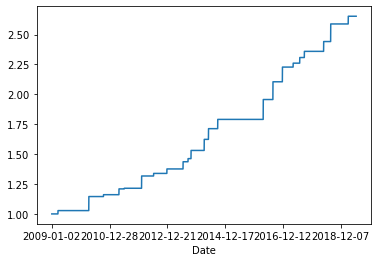

In [ ]:
book['acc return'].plot()

In [ ]:
book.tail()

,Adj Close,trade,return,acc return
Date,,,,
2019-06-18,290.984741,buy,1.0,2.652793
2019-06-19,291.641541,buy,1.0,2.652793
2019-06-20,294.427979,buy,1.0,2.652793
2019-06-21,294.000000,buy,1.0,2.652793
2019-06-24,293.640015,buy,1.0,2.652793
